In [1]:
import BioSimSpace as BSS
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

INFO:rdkit:Enabling RDKit 2023.03.3 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [64]:
#amber trajectories 1000 ns
#u_4 = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_1/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_1/amber.nc")
#u_5 = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_2/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_2/amber.nc")
#u_6 = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_3/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_lig_only_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000_2/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/espaloma/prod_1000ns_40000_3/amber_copy.parm7", "/pascal/data/project/espaloma/prod_1000ns_40000_3/amber.nc")

In [65]:
selection_test= u_4.select_atoms("index 88 or index 89 or index 90 or index 91")
print(len(selection_test))

for a in selection_test:
    print(a)

4
<Atom 89: C of type X89 of resname MOL0, resid 1 and segid SYSTEM>
<Atom 90: C of type X90 of resname MOL0, resid 1 and segid SYSTEM>
<Atom 91: C of type X91 of resname MOL0, resid 1 and segid SYSTEM>
<Atom 92: C of type X92 of resname MOL0, resid 1 and segid SYSTEM>


In [66]:
#Select Atoms
atom1 = u_4.select_atoms("index 88")
atom2 = u_4.select_atoms("index 90")
atom3 = u_4.select_atoms("index 91")
atom4 = u_4.select_atoms("index 89")


In [67]:
# Step 3: Calculate Dihedral Angles
dihedral_angles = []
for ts in u_4.trajectory[::10]:
    dihedral_angle = mda.lib.distances.calc_dihedrals(atom1.positions, atom2.positions, atom3.positions, atom4.positions)
    dihedral_angles.append(dihedral_angle)

# Convert dihedral_angles to numpy array for further analysis
dihedral_angles = np.array(dihedral_angles)

In [68]:
#Select Atoms for 2nd traj 
atom1 = u_5.select_atoms("index 88")
atom2 = u_5.select_atoms("index 90")
atom3 = u_5.select_atoms("index 91")
atom4 = u_5.select_atoms("index 89")

In [69]:
#calculate angles
dihedral_angles_2 = []
for ts in u_5.trajectory[::10]:
    dihedral_angle_2 = mda.lib.distances.calc_dihedrals(atom1.positions, atom2.positions, atom3.positions, atom4.positions)
    dihedral_angles_2.append(dihedral_angle_2)

# Convert dihedral_angles to numpy array for further analysis
dihedral_angles_2 = np.array(dihedral_angles_2)

In [70]:
#Select Atoms for 2nd traj 
atom1 = u_6.select_atoms("index 88")
atom2 = u_6.select_atoms("index 90")
atom3 = u_6.select_atoms("index 91")
atom4 = u_6.select_atoms("index 89")

In [71]:
#calculate angles
dihedral_angles_3 = []
for ts in u_6.trajectory[::10]:
    dihedral_angle_3 = mda.lib.distances.calc_dihedrals(atom1.positions, atom2.positions, atom3.positions, atom4.positions)
    dihedral_angles_3.append(dihedral_angle_3)

# Convert dihedral_angles to numpy array for further analysis
dihedral_angles_3 = np.array(dihedral_angles_3)

In [72]:
print(len(dihedral_angles))

4000


In [73]:
df_1 = pd.DataFrame(dihedral_angles, columns=['Angles'])
df_1['Angle_deg'] = np.degrees(df_1['Angles'])
df_1.index = df_1.index / 4
df_1
df_2 = pd.DataFrame(dihedral_angles_2, columns=['Angles'])
df_2['Angle_deg'] = np.degrees(df_2['Angles'])
df_2.index = df_2.index / 4
df_2
df_3 = pd.DataFrame(dihedral_angles_3, columns=['Angles'])
df_3['Angle_deg'] = np.degrees(df_3['Angles'])
df_3.index = df_3.index / 4
df_3

full_df = pd.concat([df_1, df_2, df_3])
full_df


,Angles,Angle_deg
0.00,-0.029440,-1.686795
0.25,0.049046,2.810101
0.50,0.152086,8.713895
0.75,-0.041107,-2.355258
1.00,-0.161615,-9.259869
...,...,...
998.75,0.082092,4.703546
999.00,0.093146,5.336883
999.25,-0.024137,-1.382959
999.50,0.000715,0.040957


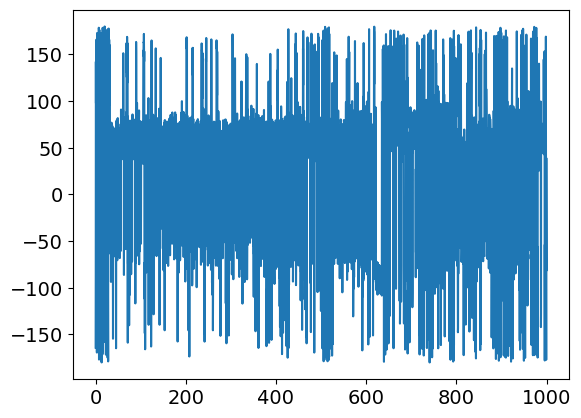

In [62]:
plt.plot(df_1["Angle_deg"])

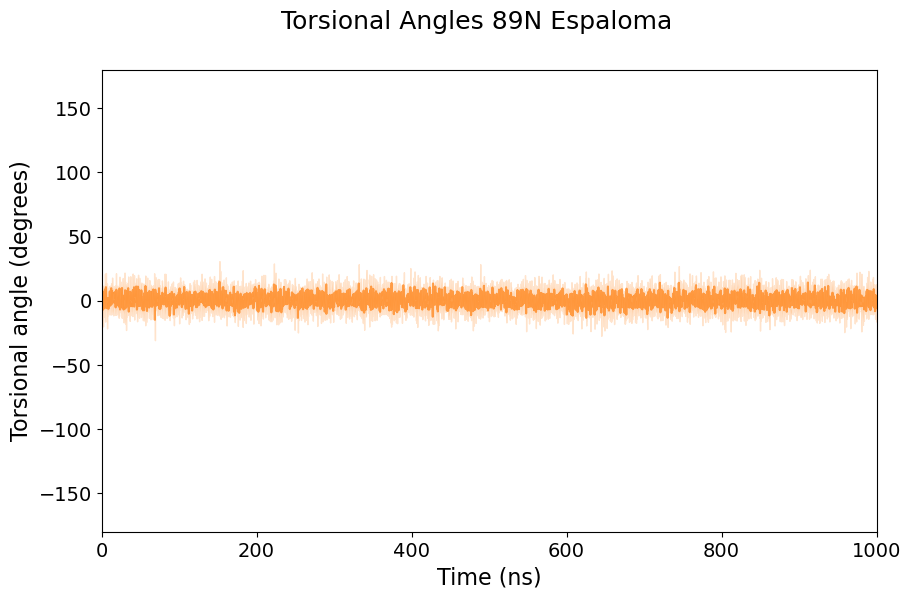

In [76]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=full_df, x=full_df.index, y='Angle_deg',alpha=0.7, estimator="mean", errorbar="sd", legend=False, color="tab:orange")
#plt.xlabel('Atom Number')
plt.xlabel('Time (ns)')
plt.ylabel("Torsional angle (degrees)")
plt.suptitle("Torsional Angles 89N Espaloma")
plt.xlim(0,1000)
plt.ylim(-180,180)
plt.savefig("plots_newamber/double_bond_esp")